# An Example of Sensitivity Analysis on the Hill Function

The purpose of this notebook is to show an example of a sensitivity analysis performed on the Hill function.

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

from trata.sampler import OneAtATimeSampler, MorrisOneAtATimeSampler, FractionalFactorialSampler, LatinHyperCubeSampler
import ibis.sensitivity


## Introduction

The Hill function is a nonlinear function in four variables.
$$f(x,a,b,c)=a\frac{x^c}{x^c+b^c}$$
For the purposes of this example, our parameter space will be $(x,a,b,c)\in[0,3]\times[2,10]\times[0,3]\times[1,20]$.

In [12]:
def hill(x, a, b, c):
    return a * (x ** c) / (x ** c + b ** c)


In [13]:
ranges = np.array([[0, 5], [2, 10], [1, 3], [1, 20]])
default = np.array([1, 5, 2, 5])


## Sampling

In [14]:
OAT_samples = OneAtATimeSampler.sample_points(box=ranges, default=default, do_oat=True, use_default=True)
OAT_samples.shape


(9, 4)

In [15]:
OAT_response = hill(*OAT_samples.T)
OAT_response.shape


(9,)

In [16]:
OAT_effects = ibis.sensitivity.one_at_a_time_effects(OAT_samples, OAT_response)
np.abs(OAT_effects).mean(axis=0)

array([0.67548305, 0.03030303, 1.2397541 , 0.19444429])

In [17]:
MOAT_samples = MorrisOneAtATimeSampler.sample_points(box=ranges, num_paths=10)
MOAT_samples.shape


(50, 4)

In [18]:
MOAT_response = hill(*MOAT_samples.T)
MOAT_response.shape


(50,)

In [19]:
MOAT_effects = ibis.sensitivity.morris_effects(MOAT_samples, MOAT_response)
np.abs(MOAT_effects).mean(axis=0)


array([1.67282378, 0.38159603, 1.69482571, 0.12376535])

In [20]:
FF_samples = FractionalFactorialSampler.sample_points(box=ranges, fraction=1).astype('float')
FF_samples.shape


(8, 4)

In [21]:
FF_response = hill(*FF_samples.T)
FF_response.shape


(8,)

In [22]:
FF_model = LinearRegression().fit(FF_samples, FF_response)
FF_model.coef_


array([ 0.99582968,  0.39323145, -0.42709247,  0.05372711])

In [23]:
LHC_samples = LatinHyperCubeSampler.sample_points(box=ranges, num_points=50).astype('float')
LHC_samples.shape


(50, 4)

In [24]:
LHC_response = hill(*LHC_samples.T)
LHC_response.shape


(50,)

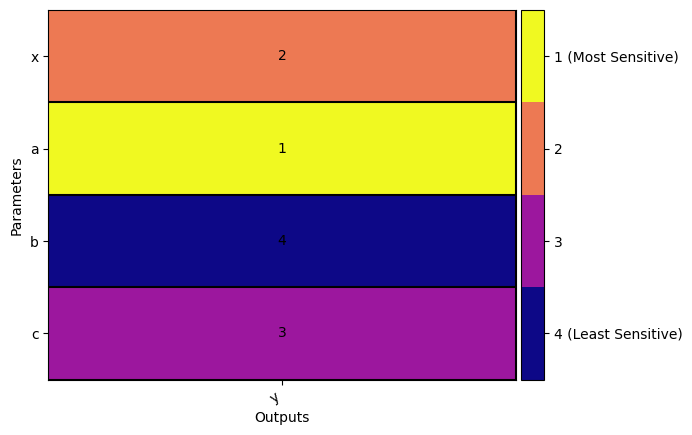

In [25]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.mutual_info_rank_plot(ax, LHC_samples, LHC_response[:, np.newaxis], ['x', 'a', 'b', 'c'], ['y'])


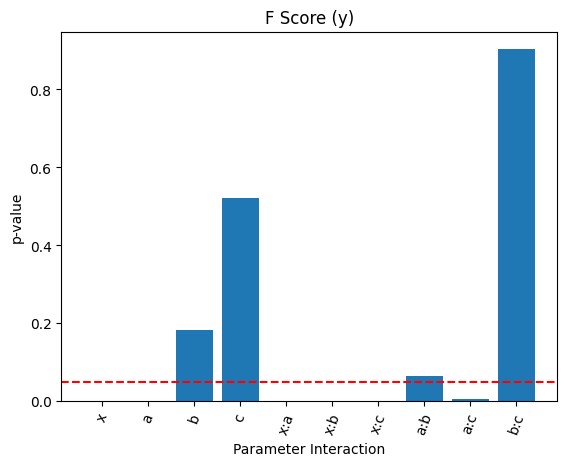

In [26]:
fig, ax = plt.subplots(1, 1)
ibis.sensitivity.f_score_plot([ax], LHC_samples, LHC_response[:, np.newaxis],
                                           ['x', 'a', 'b', 'c'], ['y'],
                                           degree=2, use_p_value=True)


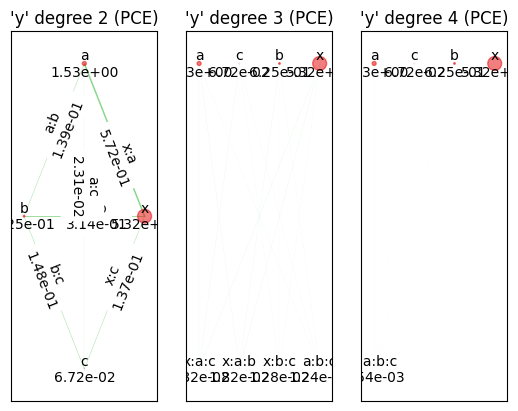

In [27]:
fig, ax = plt.subplots(1, 3)
ibis.sensitivity.pce_network_plot(ax[:, np.newaxis], LHC_samples, LHC_response[:, np.newaxis],
                                               ['x', 'a', 'b', 'c'], ['y'], ranges, 4, 5)
